# Vision

> Utils for images and videos.

In [ ]:
#| default_exp vision

In [ ]:
#| hide

from nbdev.showdoc import *
from fastcore.test import *

%nbdev_skip_test
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

UsageError: Line magic function `%nbdev_skip_test` not found.


In [ ]:
#| export

from dreamai.imports import *
from dreamai.checkers import *

ModuleNotFoundError: No module named 'dreamai'

In [ ]:
#| export

def bgr2rgb(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

def rgb2bgr(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

def gray2rgb(img):
    return cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

def rgb2gray(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

def rgb2rgba(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2RGBA)

def bgra2rgb(img):
    if len(img.shape) > 2 and img.shape[2] == 4:
        return cv2.cvtColor(img,cv2.COLOR_BGRA2RGB)

def rgba2rgb(img):
    if len(img.shape) > 2 and img.shape[2] == 4:
        return cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

def rgb_read(img, shape=None):
    "Read an image from `img` and convert it to RGB."
    '''
    Parameters
    ----------
    img : str, np.ndarray, PIL.Image
        The image to read.
    param2 : tuple, list, np.ndarray, optional
        The shape to resize the image to if it's a path.
        
    Returns
    -------
    The image as a numpy array or the original image if it's not a path.
    '''
    if not path_or_str(img):
        return img
    img = bgr2rgb(cv2.imread(str(img)))
    if shape is not None:
        img = cv2.resize(img, (shape[1], shape[0]))
    return img

def tensor_to_img(t):
    if t.dim() > 3:
        return [np.array(np.transpose(t_,(1,2,0))) for t_ in t]
    return np.array(np.transpose(t,(1,2,0)))

def plt_show(im, cmap=None, title='', figsize=(7,7)):
    if path_or_str(im):
        im = rgb_read(im)
    if is_tensor(im):
        im = tensor_to_img(im)
        if is_list(im): im = im[0]
    fig=plt.figure(figsize=figsize)
    plt.imshow(im, cmap=cmap)
    plt.title(title)
    plt.show()

def is_clip(x):
    "Return `True` if `x` is a `ProntoClip` or `moviepy` object."
    return type(x).__name__ == 'ProntoClip' or 'moviepy' in str(type(x))

def get_hw(x):
    "Return the height and width of `x`."
    if is_clip(x):
        return x.size[1], x.size[0]
    return np.array(x).shape[:2]

## Some operations on an image

In [ ]:
img_path = '/media/hamza/data2/test_image.jpg'
x = rgb_read(img_path)
x2 = cv2.imread(img_path)

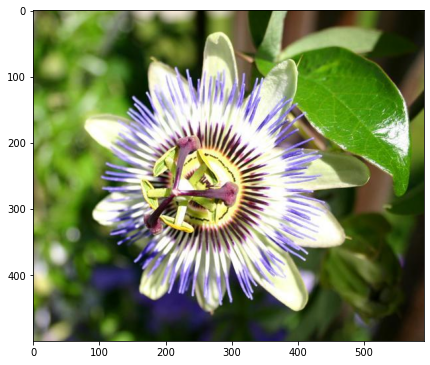

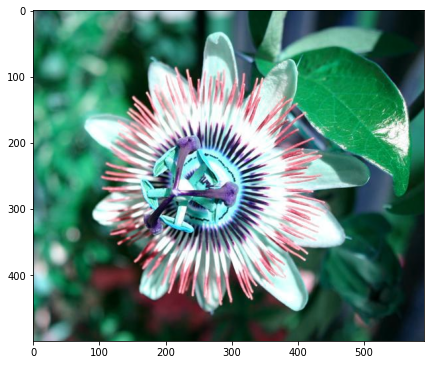

In [ ]:
plt_show(x)
plt_show(x2)

In [ ]:
get_hw(x)

(500, 591)

In [ ]:
#| hide

test_eq(get_hw(x), (500, 591))

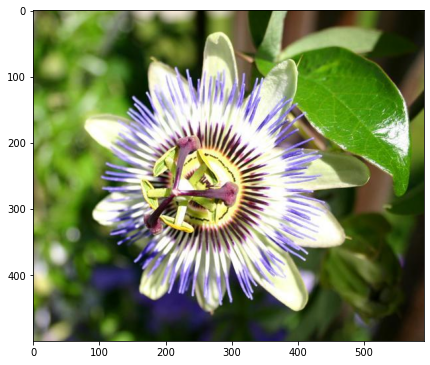

In [ ]:
plt_show(bgr2rgb(x2))

In [ ]:
test_eq(bgr2rgb(x2), x)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()